**모델의 과적합을 피하기 위한 방법**에는,
- 계수 페널라이즈드 회귀 (Coefficient penalized regression) 이 있다.

**How to?**
- training set과 test set의 비율은 전체 데이터를 기준으로 7:3의 비율로 나눌 것이다.
- training 은, SK-learn의 Ridge linear regression을 사용할 것이다.
- training 후, 모델의 성능을 측정하기 위하여 RMSE를 사용할 것이다. (Root mean squared error)

### 필요한 라이브러리를 임포트한다.

In [1]:
from urllib2 import urlopen
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

### (1) 데이터를 load 한다. training set과 test set의 비율은 7:3 이다.

In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
data = urlopen(url)
x_data = []
y_data = []
title = []
first_line = True

for line in data.readlines():
    if first_line:
        title = line.strip().split(";")
        first_line = False
    else:
        tokens = line.strip().split(";")
        # label 데이터
        y_data.append(float(tokens[-1]))
        del (tokens[-1])
        # feature vector
        x_data.append(map(float, tokens))

In [3]:
# training data : test data = 7:3
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

In [4]:
x_train[:10]

[[6.4, 0.37, 0.2, 5.6, 0.117, 61.0, 183.0, 0.99459, 3.24, 0.43, 9.5],
 [7.0, 0.14, 0.49, 5.9, 0.053, 22.0, 118.0, 0.9954, 3.36, 0.36, 9.4],
 [7.3, 0.15, 0.4, 2.0, 0.05, 24.0, 92.0, 0.9932, 3.14, 0.45, 10.5],
 [7.9, 0.21, 0.39, 2.0, 0.057, 21.0, 138.0, 0.99176, 3.05, 0.52, 10.9],
 [6.4, 0.26, 0.24, 6.4, 0.04, 27.0, 124.0, 0.9903, 3.22, 0.49, 12.6],
 [5.9, 0.19, 0.21, 1.7, 0.045, 57.0, 135.0, 0.99341, 3.32, 0.44, 9.5],
 [7.0, 0.15, 0.28, 14.7, 0.051, 29.0, 149.0, 0.99792, 2.96, 0.39, 9.0],
 [6.4, 0.105, 0.29, 1.1, 0.035, 44.0, 140.0, 0.99142, 3.17, 0.55, 10.7],
 [7.2, 0.22, 0.35, 5.5, 0.054, 37.0, 183.0, 0.99474, 3.08, 0.5, 10.3],
 [7.0, 0.21, 0.37, 7.2, 0.042, 36.0, 167.0, 0.9958, 3.26, 0.56, 9.8]]

In [5]:
y_train[:10]

[5.0, 6.0, 5.0, 5.0, 7.0, 5.0, 7.0, 7.0, 5.0, 6.0]

### (2) ridge model training을 한다.

In [6]:
alpha_list = [0.1**i for i in [0, 1, 2, 3, 4, 5, 6]]

In [7]:
# ridge regression 에서 penalty 의 scale 을 조정하는 coefficient. 
# 값이 작을수록 ordinary 선형 회귀와 동일해진다.
ridge_model_list = []

for alpha in alpha_list:
    ridge_model = linear_model.Ridge(alpha=alpha)
    ridge_model.fit(x_train, y_train)
    ridge_model_list.append(ridge_model)

### (3) lasso model training을 한다.

In [8]:
# lasso regression 에서 penalty 의 scale 을 조정하는 coefficient. 
# 값이 작을수록 ordinary 선형 회귀와 동일해진다.
lasso_model_list = []

for alpha in alpha_list:
    lasso_model = linear_model.Lasso(alpha=alpha)
    lasso_model.fit(x_train, y_train)
    lasso_model_list.append(lasso_model)

### (4) ridge모델의 rmse를 구해보자

In [9]:
# 모델의 성능을 측정하기 위해서, RMSE를 사용한다.
ridge_rmse_list = []

for model in ridge_model_list:
    # RMSE를 계산한다.
    error_vector = model.predict(x_test) - y_test
    mse = sum([error**2 for error in error_vector]) / len(error_vector)
    ridge_rmse_list.append(np.sqrt(mse))

# 결과를 출력
for i in range(len(ridge_rmse_list)):
    print("alpha : ", alpha_list[i], ", rmse : ", ridge_rmse_list[i])

('alpha : ', 1.0, ', rmse : ', 0.76384066631088232)
('alpha : ', 0.1, ', rmse : ', 0.76382917615128632)
('alpha : ', 0.010000000000000002, ', rmse : ', 0.76311572782729808)
('alpha : ', 0.0010000000000000002, ', rmse : ', 0.76023953218022111)
('alpha : ', 0.00010000000000000002, ', rmse : ', 0.75852717292871175)
('alpha : ', 1.0000000000000003e-05, ', rmse : ', 0.75828564962956757)
('alpha : ', 1.0000000000000004e-06, ', rmse : ', 0.75826073528696047)


### (5) lasso모델의 rmse를 구해보자

In [10]:
lasso_rmse_list = []

for model in lasso_model_list:
    # RMSE를 계산한다.
    error_vector = model.predict(x_test) - y_test
    mse = sum([error**2 for error in error_vector]) / len(error_vector)
    lasso_rmse_list.append(np.sqrt(mse))

# 결과를 출력
for i in range(len(lasso_rmse_list)):
    print("alpha : ", alpha_list[i], ", rmse : ", lasso_rmse_list[i])

('alpha : ', 1.0, ', rmse : ', 0.8676119495835477)
('alpha : ', 0.1, ', rmse : ', 0.79863914081638376)
('alpha : ', 0.010000000000000002, ', rmse : ', 0.77551381094380478)
('alpha : ', 0.0010000000000000002, ', rmse : ', 0.7636671701610751)
('alpha : ', 0.00010000000000000002, ', rmse : ', 0.76378164281267447)
('alpha : ', 1.0000000000000003e-05, ', rmse : ', 0.75905152156396816)
('alpha : ', 1.0000000000000004e-06, ', rmse : ', 0.75832902382332201)


### (6) linear regression model training 한다.

In [11]:
# linear model training
lin_model = linear_model.LinearRegression()
lin_model.fit(x_train, y_train)

# RMSE 측정
lin_error = lin_model.predict(x_test) - y_test
mse = sum([error**2 for error in lin_error]) / len(lin_error)
rmse = np.sqrt(mse)

print ("linear regression : ", rmse)

('linear regression : ', 0.75825795879253666)


### (7) plotting을 해보자

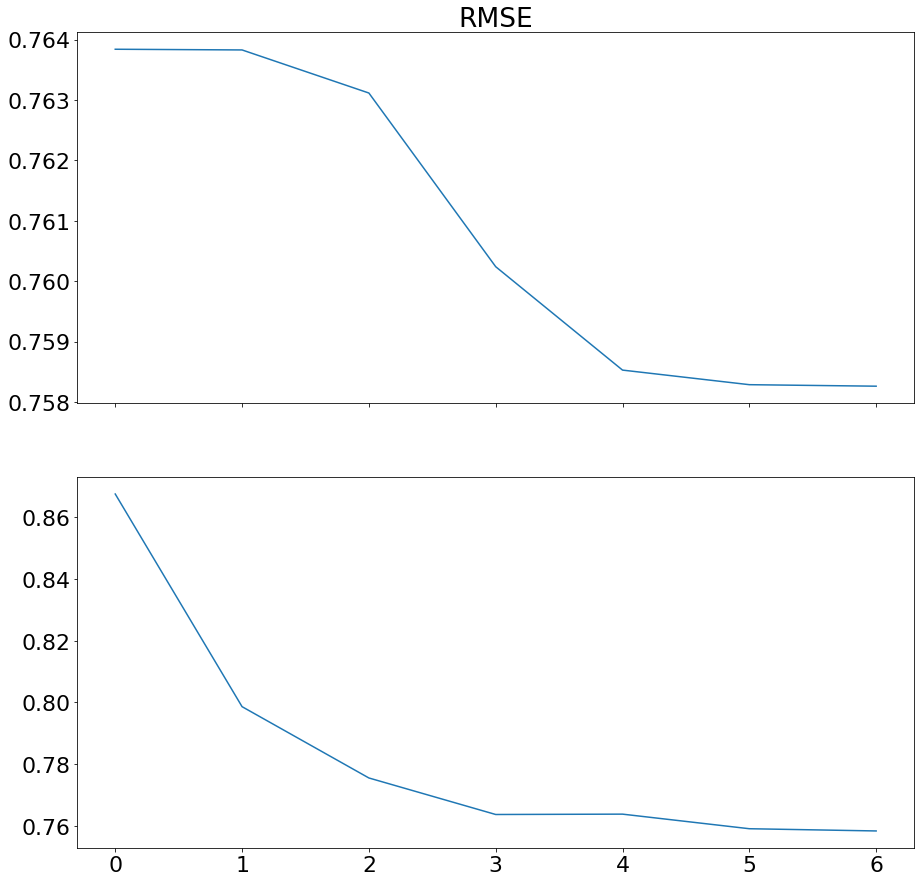

In [14]:
%matplotlib inline

import matplotlib as mpl
mpl.rcParams.update({'font.size': 22, 'figure.figsize': (15, 15)})

x_axis = range(len(ridge_model_list))

f, axarr = plt.subplots(2, sharex=True)
axarr[0].set_title('RMSE')

# 각각 모델을 플로팅해보자.
axarr[0].plot(x_axis, ridge_rmse_list)
axarr[1].plot(x_axis, lasso_rmse_list)